In [81]:
import pyart
import os
import numpy as np
from matplotlib import pyplot as plt
from __future__ import print_function
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DayLocator, HourLocator, DateFormatter, drange
from matplotlib.colors import LogNorm

import dateutil.parser
%matplotlib inline

In [2]:
status_dir = '/Users/scollis/temp/status/'
all_files = os.listdir(status_dir)

In [3]:
all_files.sort()

In [4]:
max_rf =[]
mean_rf = []
good_files = []
datetimes = []
for filen in all_files:
    fh = open(status_dir+filen)
    line = fh.readline()[23::]
    fh.close()
    try:
        p1 = float(line.split(' ')[0])
        p2 = float(line.split(' ')[1])
        max_rf.append(p1)
        mean_rf.append(p2)
        good_files.append(filen)
        datetimes.append(datetime.datetime.strptime(filen[4:-11], '%Y%m%d_%H%M%S'))
    except:
        pass
    
mean_rf = np.array(mean_rf)
max_rf = np.array(max_rf)
datetimes = np.array(datetimes)

In [5]:
print(len(all_files), len(good_files))

72502 71784


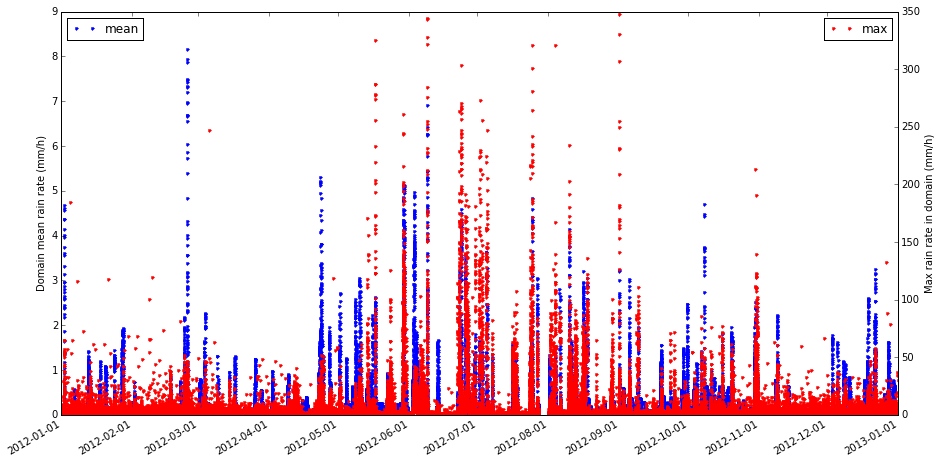

In [6]:
fig = plt.figure(figsize = [15,8])
plt.plot(mdates.date2num(datetimes), mean_rf, 'b.', label = 'mean')
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
#ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m')
fig.autofmt_xdate()

cnt = plt.gcf()
fig.autofmt_xdate()
plt.ylabel('Domain mean rain rate (mm/h)')
plt.legend(loc = 2)
ax2 = plt.twinx()
plt.plot(mdates.date2num(datetimes), max_rf, 'r.', label = 'max')
plt.ylabel('Max rain rate in domain (mm/h)')
plt.ylim([0,350])

plt.xlim([mdates.date2num(datetime.datetime(2012,1,1)), mdates.date2num(datetime.datetime(2013,1,1))])
plt.legend()

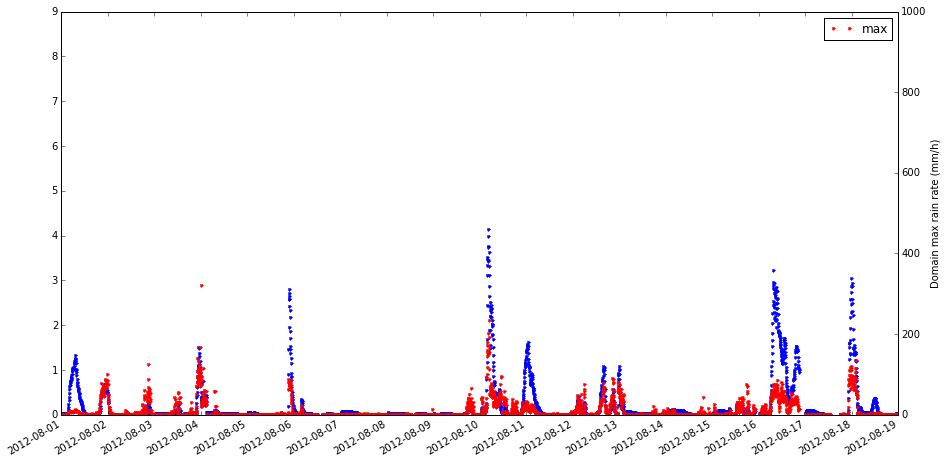

In [64]:
fig = plt.figure(figsize = [15,8])
plt.plot(mdates.date2num(datetimes), mean_rf, 'b.', label = 'mean')
ax = plt.gca()
ax.xaxis.set_major_locator(DayLocator())
#ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()

cnt = plt.gcf()
fig.autofmt_xdate()
ax2 = plt.twinx()
plt.plot(mdates.date2num(datetimes), max_rf, 'r.', label = 'max')
plt.ylabel('Domain max rain rate (mm/h)')

plt.xlim([mdates.date2num(datetime.datetime(2012,8,1)), mdates.date2num(datetime.datetime(2012,8,19))])
plt.legend()

(734558.0, 734559.0)

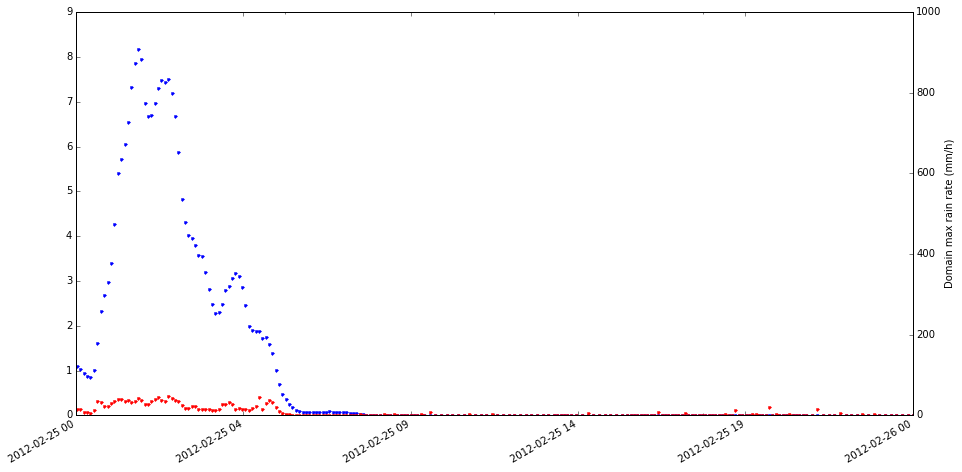

In [44]:
fig = plt.figure(figsize = [15,8])
plt.plot(mdates.date2num(datetimes), mean_rf, 'b.')
ax = plt.gca()
#ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H')
fig.autofmt_xdate()

cnt = plt.gcf()
fig.autofmt_xdate()
ax2 = plt.twinx()
plt.plot(mdates.date2num(datetimes), max_rf, 'r.')
plt.ylabel('Domain max rain rate (mm/h)')

plt.xlim([mdates.date2num(datetime.datetime(2012,2,25)), mdates.date2num(datetime.datetime(2012,2,26))])

(734807.0, 734809.0)

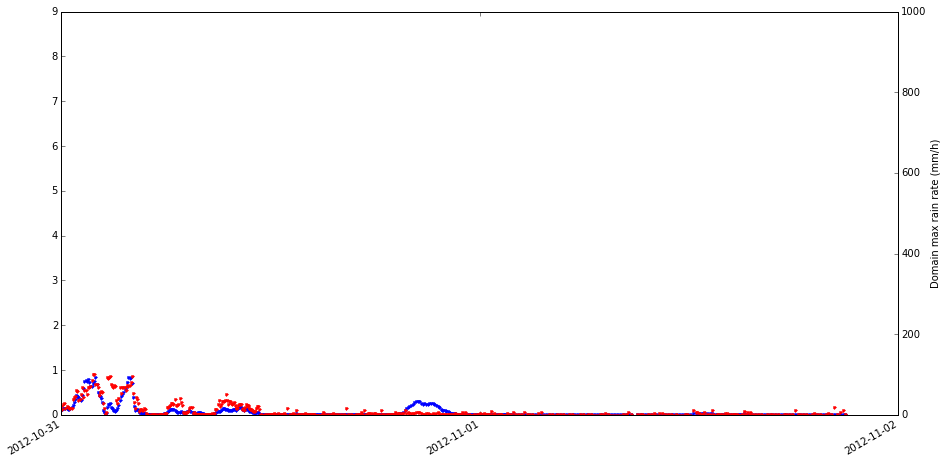

In [52]:
fig = plt.figure(figsize = [15,8])
plt.plot(mdates.date2num(datetimes), mean_rf, 'b.')
ax = plt.gca()
ax.xaxis.set_major_locator(DayLocator())
#ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()

cnt = plt.gcf()
fig.autofmt_xdate()
ax2 = plt.twinx()
plt.plot(mdates.date2num(datetimes), max_rf, 'r.')
plt.ylabel('Domain max rain rate (mm/h)')

plt.xlim([mdates.date2num(datetime.datetime(2012,10,31)), mdates.date2num(datetime.datetime(2012,11,2))])

In [76]:
print(len(all_files))

5979


In [80]:
print(all_files[0])

KGYX20120101_000026_V03.status


In [81]:
meg='KGYX20120223_020527_V030.599752783775 0.0193685759847'

In [85]:
print(meg[23::])

0.599752783775 0.0193685759847


In [108]:
f = """
Timing: 
[scollis@blogin2 maine_out]$ date
Tue Dec  1 20:05:27 CST 2015
[scollis@blogin2 maine_out]$ date
Tue Dec  1 20:05:36 CST 2015
[scollis@blogin2 maine_out]$ date
Tue Dec  1 20:05:36 CST 2015
[scollis@blogin2 maine_out]$ ls -lh *.status |wc
   2064   18576  152736
[scollis@blogin2 maine_out]$ date
Tue Dec  1 20:23:01 CST 2015
[scollis@blogin2 maine_out]$ ls -lh *.status |wc
   4771   42939  353054
[scollis@blogin2 maine_out]$ ls -lh *.status |wc
   8607   77463  636918
[scollis@blogin2 maine_out]$ date
Tue Dec  1 20:48:19 CST 2015
[scollis@blogin2 maine_out]$ 
[scollis@blogin2 maine_out]$ ls -lh *.status |wc
  10627   95643  786398
[scollis@blogin2 maine_out]$ date
Tue Dec  1 21:01:35 CST 2015
[scollis@blogin2 maine_out]$ 

#!/bin/bash
#PBS -l nodes=16:ppn=16
#PBS -l walltime=03:59:00
#PBS -j oe
#PBS -V
#PBS -N IPythonMPI0

ipcluster start --n=256 --profile=mpi0
"""



In [18]:
print(len(max_rf))
print(len(mean_rf))

44260
44218


In [77]:
hours = np.linspace(0,23,24)
boxed_means_hours = []
for hour in hours:
    foo = [ a.hour == hour for a in datetimes]
    boxed_means_hours.append(mean_rf[np.where(foo)])

months = np.linspace(1,12,12)
boxed_means_months = []
for month in months:
    foo = [ a.month == month for a in datetimes]
    boxed_means_months.append(mean_rf[np.where(foo)])


hrly = np.array([a.mean() for a in boxed_means_hours])
monthly = np.array([a.mean() for a in boxed_means_months])
nbins = 100
rr = (0.2, 5)
hist_rf = np.zeros([len(hours), nbins])
for i in range(len(hours)):
    bine = np.histogram(boxed_means_hours[i], bins=nbins, range= rr)[1]
    hist_rf[i,:] = np.histogram(boxed_means_hours[i], bins=nbins, range= rr)[0]
    #print(np.histogram(boxed_means[i], bins=nbins, range=(0.1, 1))[0])
lt = (hours - 5) % 24
lts = ["%d" % a for a in lt] 
hist_rf_monthly = np.zeros([len(months), nbins])
for i in range(len(months)):
    bine2 = np.histogram(boxed_means_months[i], bins=nbins, range= rr)[1]
    hist_rf_monthly[i,:] = np.histogram(boxed_means_months[i], bins=nbins, range= rr)[0]
    #print(np.histogram(boxed_means[i], bins=nbins, range=(0.1, 1))[0])

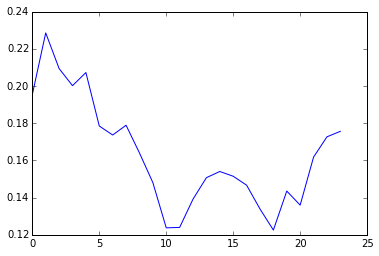

In [57]:
plt.plot(hours, hrly)

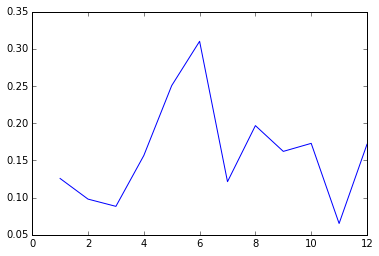

In [58]:
plt.plot(months, monthly)

<matplotlib.colorbar.Colorbar instance at 0x111a4cf80>

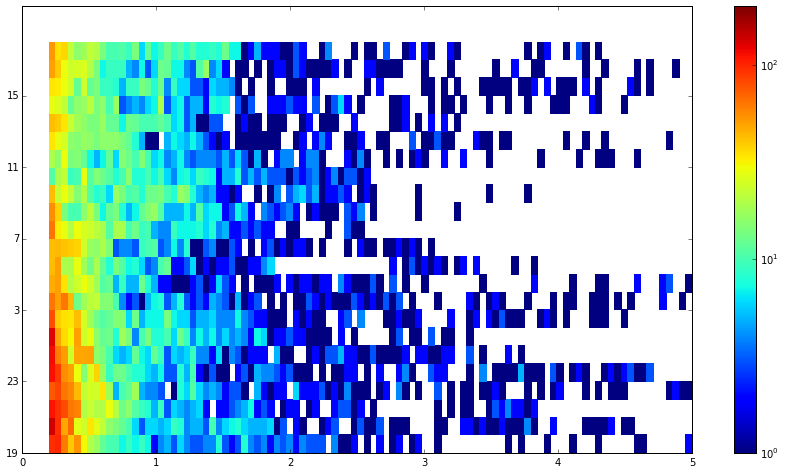

In [83]:
fig = plt.figure(figsize = [15,8])
plt.pcolormesh(bine, hours, hist_rf, norm=LogNorm(vmin=1, vmax=200))
ax = plt.gca()
mty = plt.yticks(hours[::4], lts[::4])
plt.colorbar()

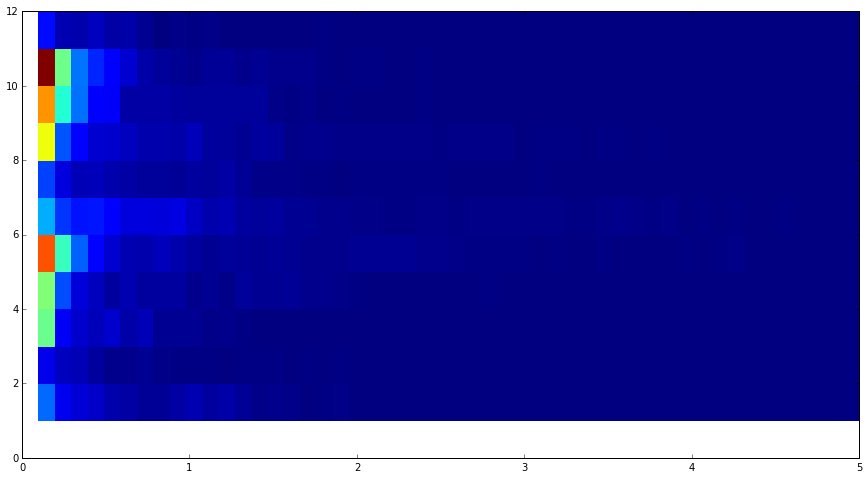

In [60]:
fig = plt.figure(figsize = [15,8])
plt.pcolormesh(bine2, months, hist_rf_monthly)
